# 1. Import necessary libraries and load the dataset and display random 5 samples. Check the info of the data and write your findings. 

In [1]:
# Importing necessary libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings
warnings.filterwarnings(action='ignore')

In [8]:
# Read the .csv file

df_census=pd.read_csv("C:\\Users\\raju\\Desktop\\adult.csv")

In [9]:
# Displaying the top 5 rows of the data

df_census.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
df_census.shape

(32561, 15)

We have 32561 rows and 15 columns in the data. 

As we can see from the data there both numerical and categorical values

In [13]:
df_census.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
dtype: object

In [12]:
df_census['income']=df_census['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df_census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


# 2.	What is the average age of males and females in the data? 

In [14]:
pd.pivot_table(df_census, index=["sex"], values=["age"], aggfunc = np.mean)

,age
sex,
Female,36.858230
Male,39.433547


In [15]:
df_census.groupby("sex")[["age"]].mean()

,age
sex,
Female,36.858230
Male,39.433547


# 3.	Identify the qualifications of most of the individuals and display it using an appropriate plot?

In [16]:
df_census.groupby('education')['education'].count().sort_values(ascending=False)

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

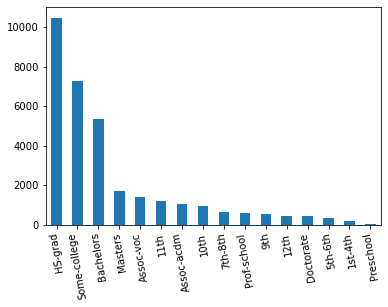

In [145]:
df_census.education.value_counts().plot(kind='bar', rot=100)

plt.show()

# 4.	Find the middle most observation of age for different working classes.

In [51]:
# To find middle observations we have to remove or replace the missing values



df=df_census.replace('?',np.NaN)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [52]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [53]:
pd.pivot_table(df, index=["workclass"], values=["age"], aggfunc = np.median)

,age
workclass,
Federal-gov,43
Local-gov,41
Never-worked,18
Private,35
Self-emp-inc,45
Self-emp-not-inc,44
State-gov,39
Without-pay,57


# OR

In [54]:
df.groupby('workclass')['age'].median()

workclass
Federal-gov         43.0
Local-gov           41.0
Never-worked        18.0
Private             35.0
Self-emp-inc        45.0
Self-emp-not-inc    44.0
State-gov           39.0
Without-pay         57.0
Name: age, dtype: float64

# 5.	What is the percentage of the Asian-Pac-Islander race people in the data? 

In [55]:
df['race'].value_counts()['Asian-Pac-Islander']*100/df['race'].count()

3.190933939375326

# 6.	Which occupation has more variability in the working hours? 

In [68]:
df.groupby('occupation')['hours.per.week'].var().sort_values(ascending=False)

occupation
Farming-fishing      299.987814
Priv-house-serv      261.939597
Armed-Forces         198.000000
Sales                175.202547
Transport-moving     161.833503
Other-service        161.442544
Prof-specialty       157.159186
Protective-serv      152.072728
Exec-managerial      123.412395
Tech-support         112.001859
Handlers-cleaners    111.946104
Adm-clerical          91.964888
Craft-repair          81.939394
Machine-op-inspct     57.648955
Name: hours.per.week, dtype: float64

As we can see from the above output, Farming-Fishing has more variability in the working hours

# 7.	What is the range of the middle 50% of working hours per week? 

In [132]:
# Quantile 50%


print('df_quantile(50%):', df.quantile(q=0.50))

df_quantile(50%): age                   37.0
fnlwgt            178356.0
education.num         10.0
capital.gain           0.0
capital.loss           0.0
hours.per.week        40.0
income                 0.0
is_male                0.0
Name: 0.5, dtype: float64


In [149]:
# IQR value for hours.per.week


df["hours.per.week"].quantile(0.75) - df["hours.per.week"].quantile(0.25)

5.0

# 8. Are there any negatively skewed features? Support your answer with a metric and the plot.

In [44]:
df.skew()

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
dtype: float64

education.num is negatively skewed and we can also observe this from correlation matrix and histogram. 

In the plat we can see that most frequent value are high and tail is towards low values

<function matplotlib.pyplot.show(close=None, block=None)>

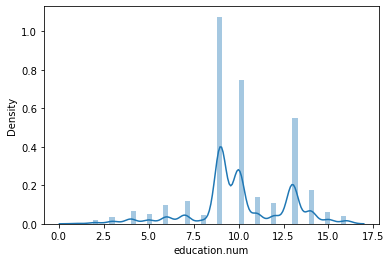

In [72]:
sns.distplot(df['education.num'])
plt.show

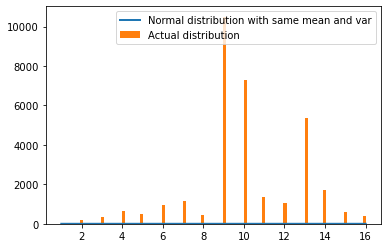

In [115]:
# Histofram to chec skewness 


import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['education.num'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [63]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


# 9.	Identify the presence of extreme values in age using visualization techniques. 

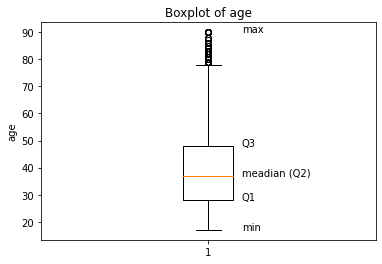

In [67]:
plt.boxplot(df['age'])

plt.text(x = 1.1, y = df['age'].min(), s ='min')
plt.text(x = 1.1, y = df.age.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = df['age'].median(), s ='meadian (Q2)')
plt.text(x = 1.1, y = df.age.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = df['age'].max(), s ='max')


plt.title('Boxplot of age')
plt.ylabel('age')

# display the plot
plt.show()

We can see from the above plot there are more outliers towards the right, those are the extreme values. This is observed by box plots which gives the outliers in the data

# 10.	Is there any effect of age on the working hours of a person? Support your answer with a metric and the plot. 

In [73]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<AxesSubplot:>

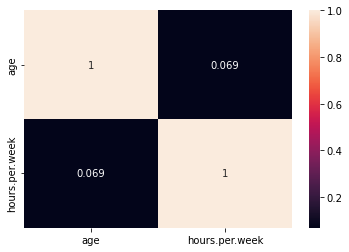

In [133]:
df1=df[['age','hours.per.week']]
df1
corr_matrix=df1.corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True)

The above plot shows that there is low correlation between 'age' and 'hours.per.week' (0.069).

There is no effect of age on working hours as we can see there is very less correlation between age and woring hours.

# 11.	Is there any individual with age less than 18 and capital loss less than 100? 

In [112]:
display(df.loc[(df['age']<18) & (df['capital.loss']<100),['age','capital.loss']])


# There are 385 individuals with age less than 18 and capital loss less than 100

,age,capital.loss
1680,17,0
3987,17,0
4151,17,0
4154,17,0
4156,17,0
...,...,...
31869,17,0
31948,17,0
32035,17,0
32310,17,0


# 12.	Which occupation has the highest number of males? 

In [131]:
df.groupby(['occupation','sex'])['sex'].count().sort_values(ascending=False)


#as we can see Craft-repair has highest number of males

occupation         sex   
Craft-repair       Male      3877
Exec-managerial    Male      2907
Prof-specialty     Male      2625
Adm-clerical       Female    2537
Sales              Male      2387
Other-service      Female    1800
Prof-specialty     Female    1515
Transport-moving   Male      1507
Other-service      Male      1495
Machine-op-inspct  Male      1452
Sales              Female    1263
Adm-clerical       Male      1233
Handlers-cleaners  Male      1206
Exec-managerial    Female    1159
Farming-fishing    Male       929
Tech-support       Male       580
Protective-serv    Male       573
Machine-op-inspct  Female     550
Tech-support       Female     348
Craft-repair       Female     222
Handlers-cleaners  Female     164
Priv-house-serv    Female     141
Transport-moving   Female      90
Protective-serv    Female      76
Farming-fishing    Female      65
Armed-Forces       Male         9
Priv-house-serv    Male         8
Name: sex, dtype: int64

# 13.	Analyze the trend of the capital gain amount for different educational qualifications and write your observations. 

In [134]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,is_male
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037,-0.088832
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463,-0.026858
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154,-0.012280
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329,-0.048480
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526,-0.045567
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689,-0.229309
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000,-0.215980
is_male,-0.088832,-0.026858,-0.012280,-0.048480,-0.045567,-0.229309,-0.215980,1.000000


In [146]:
df_1=df.groupby('education')['capital.gain'].mean().to_frame().reset_index().sort_values(by='capital.gain')
df_1

,education,capital.gain
3,1st-4th,125.875000
4,5th-6th,176.021021
1,11th,215.097872
5,7th-8th,233.939628
2,12th,284.087760
6,9th,342.089494
0,10th,404.574491
11,HS-grad,576.800114
15,Some-college,598.824167
7,Assoc-acdm,640.399250


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

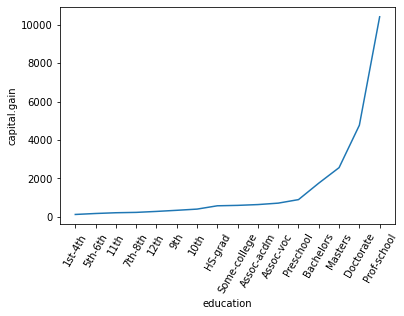

In [148]:
sns.lineplot(data=df_1, x='education', y='capital.gain')
plt.xticks(rotation=60)

# 14.	Compare the working hours for each working class and write your observations. 

In [141]:
pd.pivot_table(df, index=["workclass"], values=["hours.per.week"])

,hours.per.week
workclass,
Federal-gov,41.379167
Local-gov,40.982800
Never-worked,28.428571
Private,40.267096
Self-emp-inc,48.818100
Self-emp-not-inc,44.421881
State-gov,39.031587
Without-pay,32.714286


As we can observe from the above pivot table, working hours for self-emp-inc are more compared to other working class.

we can also see that the self employed person with no income is also working for more hours and also 2nd highest in working hours.

# 15.	Is there an all male profession according to the data? 

In [123]:
df.groupby(['occupation','sex'])['sex'].count()

occupation         sex   
Adm-clerical       Female    2537
                   Male      1233
Armed-Forces       Male         9
Craft-repair       Female     222
                   Male      3877
Exec-managerial    Female    1159
                   Male      2907
Farming-fishing    Female      65
                   Male       929
Handlers-cleaners  Female     164
                   Male      1206
Machine-op-inspct  Female     550
                   Male      1452
Other-service      Female    1800
                   Male      1495
Priv-house-serv    Female     141
                   Male         8
Prof-specialty     Female    1515
                   Male      2625
Protective-serv    Female      76
                   Male       573
Sales              Female    1263
                   Male      2387
Tech-support       Female     348
                   Male       580
Transport-moving   Female      90
                   Male      1507
Name: sex, dtype: int64

From the above output we can observe that in Armed-Forces there are only males who are working and no females.